In [54]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

from src import data, paths,labels
!date -I

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-05-13


In [55]:
mapping = pd.read_csv(data.path('interim/DICE_Glasser_Yeo17_Schaefer200_labelMapping.csv'),index_col=0)
mapping

,regionName,Yeo17,Schaefer200,regionLongName,regionIdLabel,LR,region,Lobe,cortex,regionID,Cortex_ID,x-cog,y-cog,z-cog,volmm
0,V1_L,2_Visual_B,7Networks_LH_Vis_10,Primary_Visual_Cortex_L,1_L,L,V1,Occ,Primary_Visual,1,1,100.491589,41.138901,71.637040,6717
1,V6_L,2_Visual_B,7Networks_LH_Vis_12,Sixth_Visual_Area_L,3_L,L,V6,Occ,Dorsal_Stream_Visual,3,3,104.543112,44.481665,103.916749,1009
2,V2_L,2_Visual_B,7Networks_LH_Vis_13,Second_Visual_Area_L,4_L,L,V2,Occ,Early_Visual,4,2,102.236656,44.064791,74.401125,6220
3,V3_L,1_Visual_A,7Networks_LH_Vis_13,Third_Visual_Area_L,5_L,L,V3,Occ,Early_Visual,5,2,107.926111,40.632159,76.961153,4994
4,V4_L,1_Visual_A,7Networks_LH_Vis_2,Fourth_Visual_Area_L,6_L,L,V4,Occ,Early_Visual,6,2,120.481621,41.344329,69.955702,3183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,FOP2_R,4_Somatomotor_B,7Networks_RH_SomMot_3,Frontal_Opercular_Area_2_R,315_R,R,FOP2,Ins,Insular_and_Frontal_Opercular,315,12,49.524038,122.612981,86.716346,416
356,PoI1_R,7_Dorsal_Attention_B,7Networks_RH_SalVentAttn_FrOperIns_2,Area_Posterior_Insular_1_R,367_R,R,PoI1,Ins,Insular_and_Frontal_Opercular,367,12,52.456420,115.341143,68.178069,1067
357,Ig_R,4_Somatomotor_B,7Networks_RH_SomMot_3,Insular_Granular_Complex_R,368_R,R,Ig,Ins,Insular_and_Frontal_Opercular,368,12,54.984127,112.083900,86.482993,441
358,FOP5_R,8_Salience+Ventral_Attention_A,7Networks_RH_SalVentAttn_FrOperIns_3,Area_Frontal_Opercular_5_R,369_R,R,FOP5,Ins,Insular_and_Frontal_Opercular,369,12,53.738178,153.878893,75.189158,867


In [56]:
mapping_glasser_schaefer = mapping[["regionName","Schaefer200"]]
mapping_glasser_schaefer

,regionName,Schaefer200
0,V1_L,7Networks_LH_Vis_10
1,V6_L,7Networks_LH_Vis_12
2,V2_L,7Networks_LH_Vis_13
3,V3_L,7Networks_LH_Vis_13
4,V4_L,7Networks_LH_Vis_2
...,...,...
355,FOP2_R,7Networks_RH_SomMot_3
356,PoI1_R,7Networks_RH_SalVentAttn_FrOperIns_2
357,Ig_R,7Networks_RH_SomMot_3
358,FOP5_R,7Networks_RH_SalVentAttn_FrOperIns_3


In [57]:
glasser_centroids = mapping[["regionName","x-cog","y-cog","z-cog"]].copy()
glasser_centroids

,regionName,x-cog,y-cog,z-cog
0,V1_L,100.491589,41.138901,71.637040
1,V6_L,104.543112,44.481665,103.916749
2,V2_L,102.236656,44.064791,74.401125
3,V3_L,107.926111,40.632159,76.961153
4,V4_L,120.481621,41.344329,69.955702
...,...,...,...,...
355,FOP2_R,49.524038,122.612981,86.716346
356,PoI1_R,52.456420,115.341143,68.178069
357,Ig_R,54.984127,112.083900,86.482993
358,FOP5_R,53.738178,153.878893,75.189158


In [58]:
minimum = glasser_centroids[["x-cog","y-cog","z-cog"]].min(axis=None)
maximum = glasser_centroids[["x-cog","y-cog","z-cog"]].max(axis=None)

for c in ["x-cog","y-cog","z-cog"]:
    glasser_centroids[c+"_s"] = (glasser_centroids[c]-glasser_centroids[c].min()) / (maximum-minimum)
glasser_centroids

,regionName,x-cog,y-cog,z-cog,x-cog_s,y-cog_s,z-cog_s
0,V1_L,100.491589,41.138901,71.637040,0.445702,0.044836,0.273458
1,V6_L,104.543112,44.481665,103.916749,0.469788,0.064708,0.465359
2,V2_L,102.236656,44.064791,74.401125,0.456077,0.062230,0.289890
3,V3_L,107.926111,40.632159,76.961153,0.489900,0.041823,0.305109
4,V4_L,120.481621,41.344329,69.955702,0.564542,0.046057,0.263462
...,...,...,...,...,...,...,...
355,FOP2_R,49.524038,122.612981,86.716346,0.142704,0.529194,0.363103
356,PoI1_R,52.456420,115.341143,68.178069,0.160136,0.485963,0.252894
357,Ig_R,54.984127,112.083900,86.482993,0.175163,0.466599,0.361716
358,FOP5_R,53.738178,153.878893,75.189158,0.167756,0.715068,0.294575


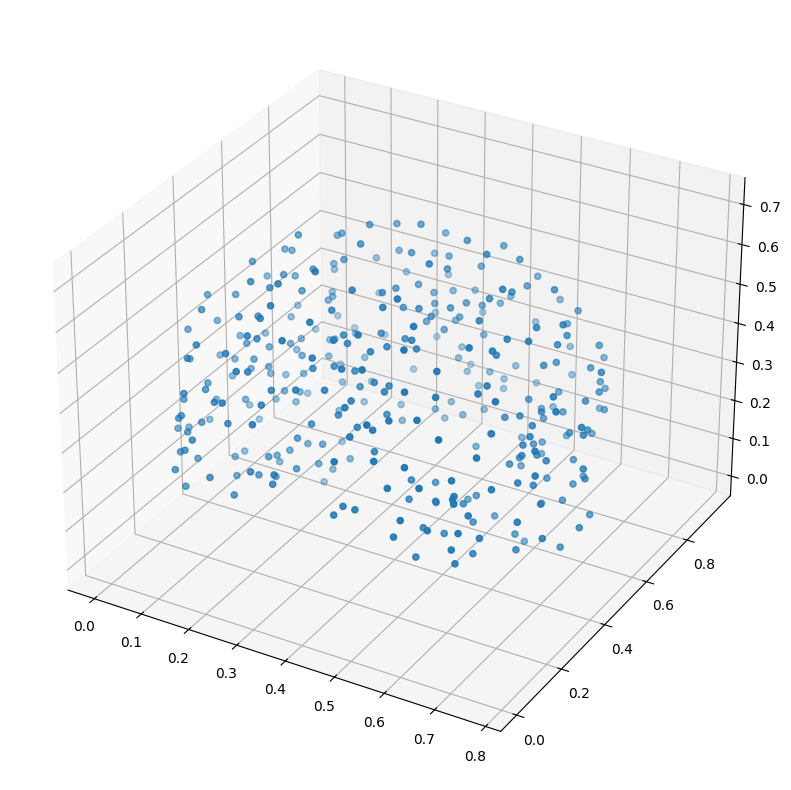

In [59]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(glasser_centroids["x-cog_s"], glasser_centroids["y-cog_s"], glasser_centroids["z-cog_s"])
plt.show()

In [60]:
schaefer_centroids = pd.read_csv(data.path('external/schaefer_parcellation_centroids/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv'),index_col=0)
schaefer_centroids

,ROI Name,R,A,S
ROI Label,,,,
1,7Networks_LH_Vis_1,-24,-54,-10
2,7Networks_LH_Vis_2,-26,-78,-14
3,7Networks_LH_Vis_3,-46,-70,-8
4,7Networks_LH_Vis_4,-10,-68,-4
5,7Networks_LH_Vis_5,-26,-96,-12
...,...,...,...,...
196,7Networks_RH_Default_PFCdPFCm_6,28,30,42
197,7Networks_RH_Default_PFCdPFCm_7,24,24,54
198,7Networks_RH_Default_pCunPCC_1,12,-54,14


In [61]:
minimum = schaefer_centroids[["R","A","S"]].min(axis=None)
maximum = schaefer_centroids[["R","A","S"]].max(axis=None)

for c in ["R","A","S"]:
    schaefer_centroids[c+"_s"] = (schaefer_centroids[c]-schaefer_centroids[c].min()) / (maximum-minimum)
schaefer_centroids

,ROI Name,R,A,S,R_s,A_s,S_s
ROI Label,,,,,,,
1,7Networks_LH_Vis_1,-24,-54,-10,0.228916,0.253012,0.180723
2,7Networks_LH_Vis_2,-26,-78,-14,0.216867,0.108434,0.156627
3,7Networks_LH_Vis_3,-46,-70,-8,0.096386,0.156627,0.192771
4,7Networks_LH_Vis_4,-10,-68,-4,0.313253,0.168675,0.216867
5,7Networks_LH_Vis_5,-26,-96,-12,0.216867,0.000000,0.168675
...,...,...,...,...,...,...,...
196,7Networks_RH_Default_PFCdPFCm_6,28,30,42,0.542169,0.759036,0.493976
197,7Networks_RH_Default_PFCdPFCm_7,24,24,54,0.518072,0.722892,0.566265
198,7Networks_RH_Default_pCunPCC_1,12,-54,14,0.445783,0.253012,0.325301


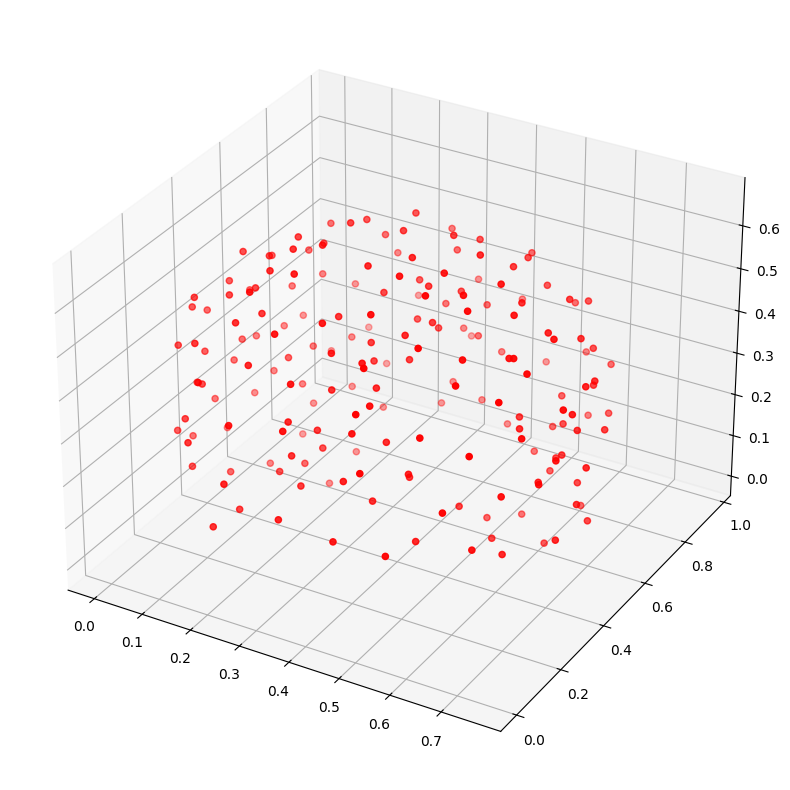

In [62]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(schaefer_centroids["R_s"], schaefer_centroids["A_s"], schaefer_centroids["S_s"],c="r")
plt.show()

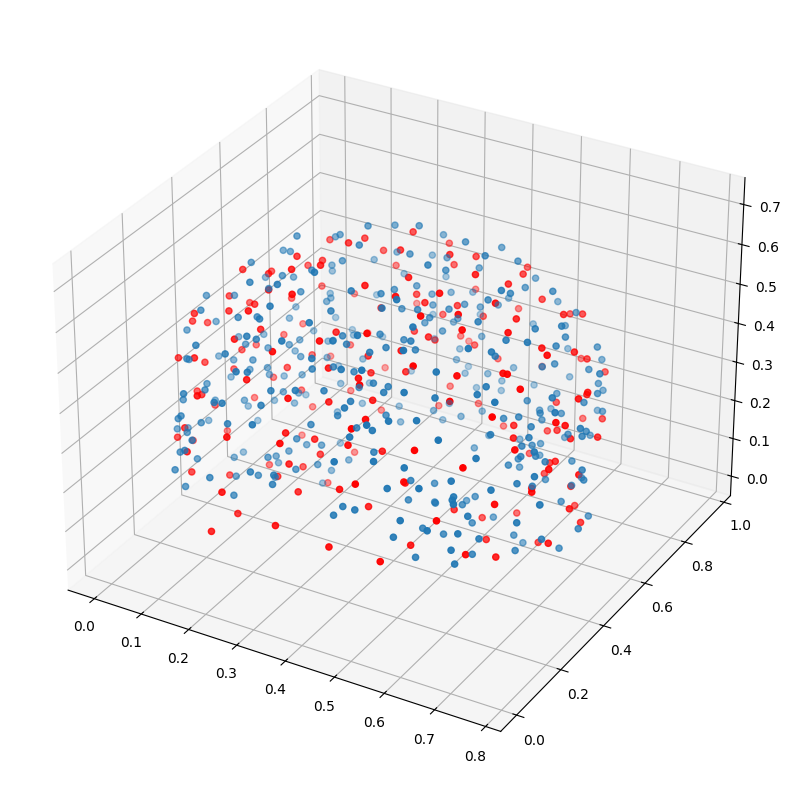

In [63]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(glasser_centroids["x-cog_s"], glasser_centroids["y-cog_s"], glasser_centroids["z-cog_s"])
ax.scatter(schaefer_centroids["R_s"], schaefer_centroids["A_s"], schaefer_centroids["S_s"],c="r")
plt.show()

In [64]:
mapping_coordinates = pd.merge(mapping_glasser_schaefer,glasser_centroids,on="regionName")
mapping_coordinates = pd.merge(mapping_coordinates,schaefer_centroids,left_on="Schaefer200",right_on="ROI Name")
mapping_coordinates

,regionName,Schaefer200,x-cog,y-cog,z-cog,x-cog_s,y-cog_s,z-cog_s,ROI Name,R,A,S,R_s,A_s,S_s
0,V1_L,7Networks_LH_Vis_10,100.491589,41.138901,71.637040,0.445702,0.044836,0.273458,7Networks_LH_Vis_10,-12,-70,8,0.301205,0.156627,0.289157
1,V6_L,7Networks_LH_Vis_12,104.543112,44.481665,103.916749,0.469788,0.064708,0.465359,7Networks_LH_Vis_12,-12,-72,22,0.301205,0.144578,0.373494
2,DVT_L,7Networks_LH_Vis_12,108.042324,53.086307,103.566805,0.490591,0.115862,0.463278,7Networks_LH_Vis_12,-12,-72,22,0.301205,0.144578,0.373494
3,V2_L,7Networks_LH_Vis_13,102.236656,44.064791,74.401125,0.456077,0.062230,0.289890,7Networks_LH_Vis_13,-6,-88,28,0.337349,0.048193,0.409639
4,V3_L,7Networks_LH_Vis_13,107.926111,40.632159,76.961153,0.489900,0.041823,0.305109,7Networks_LH_Vis_13,-6,-88,28,0.337349,0.048193,0.409639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,Pir_R,7Networks_RH_SalVentAttn_FrOperIns_1,57.555081,133.362084,52.703672,0.190448,0.593097,0.160900,7Networks_RH_SalVentAttn_FrOperIns_1,40,6,-16,0.614458,0.614458,0.144578
356,PI_R,7Networks_RH_SalVentAttn_FrOperIns_1,47.013363,123.157016,57.926503,0.127778,0.532428,0.191950,7Networks_RH_SalVentAttn_FrOperIns_1,40,6,-16,0.614458,0.614458,0.144578
357,AVI_R,7Networks_RH_Cont_PFCv_1,58.445161,150.959140,67.720430,0.195739,0.697710,0.250174,7Networks_RH_Cont_PFCv_1,34,22,-8,0.578313,0.710843,0.192771
358,AAIC_R,7Networks_RH_Cont_PFCv_1,54.936552,141.408966,60.337241,0.174881,0.640935,0.206281,7Networks_RH_Cont_PFCv_1,34,22,-8,0.578313,0.710843,0.192771


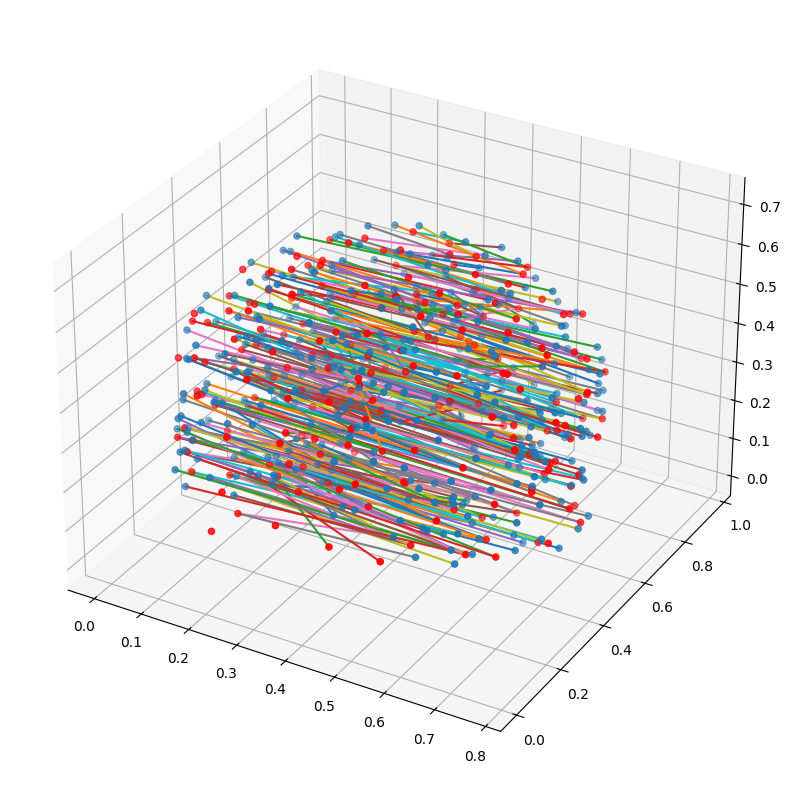

In [65]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(mapping_coordinates["x-cog_s"], mapping_coordinates["y-cog_s"], mapping_coordinates["z-cog_s"])
ax.scatter(mapping_coordinates["R_s"], mapping_coordinates["A_s"], mapping_coordinates["S_s"],c="r")
for i,row in mapping_coordinates.iterrows():
    ax.plot([row["R_s"], row["x-cog_s"]], [row["A_s"],row["y-cog_s"]],zs=[row["S_s"],row["z-cog_s"]])
plt.show()

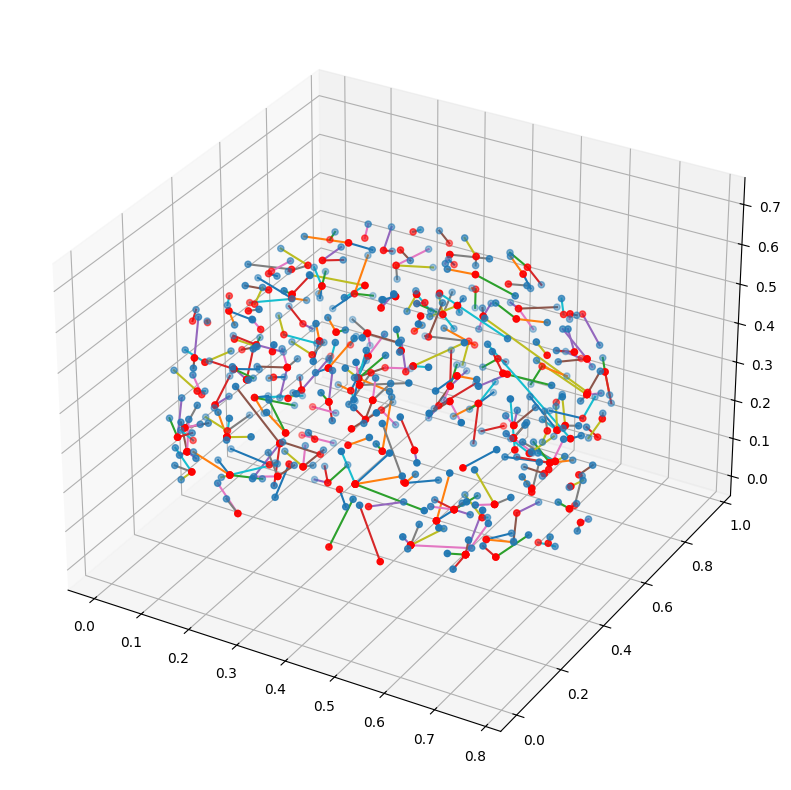

In [68]:
# flip x coordinate

mapping_coordinates["x-cog_s_flip"] = -mapping_coordinates["x-cog_s"]+mapping_coordinates["x-cog_s"].max()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(mapping_coordinates["x-cog_s_flip"], mapping_coordinates["y-cog_s"], mapping_coordinates["z-cog_s"])
ax.scatter(mapping_coordinates["R_s"], mapping_coordinates["A_s"], mapping_coordinates["S_s"],c="r")
for i,row in mapping_coordinates.iterrows():
    ax.plot([row["R_s"], row["x-cog_s_flip"]], [row["A_s"],row["y-cog_s"]],zs=[row["S_s"],row["z-cog_s"]])
plt.show()